In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random
import os

# Logistic regression
### Generate Data
* input N, mx1, vx1, my1, vy1, mx2, vx2, my2, vy2

In [2]:
def Box_Muller():
    U, V = np.random.uniform(0, 1, 2)
    X = math.sqrt(-2 * math.log(U)) * math.cos(2*math.pi*V)
    Y = math.sqrt(-2 * math.log(V)) * math.sin(2*math.pi*U)
    
    return X

def GaussianGen(u, v):
    while True:
        D = Box_Muller()
        yield u + math.sqrt(v) * D

def logestic(x):
    return 1.0 / (1 + np.exp(-x))

In [3]:
N = 50
mx1, vx1 = 1, 2
my1, vy1 = 1, 2
mx2, vx2 = 3, 4
my2, vy2 = 3, 4

GGx1 = GaussianGen(mx1, vx1)
GGy1 = GaussianGen(my1, vy1)
GGx2 = GaussianGen(mx2, vx2)
GGy2 = GaussianGen(my2, vy2)
D1 = np.array([[next(GGx1), next(GGy1)] for _ in range(N)])
D2 = np.array([[next(GGx2), next(GGy2)] for _ in range(N)])
Data = np.vstack((D1, D2))


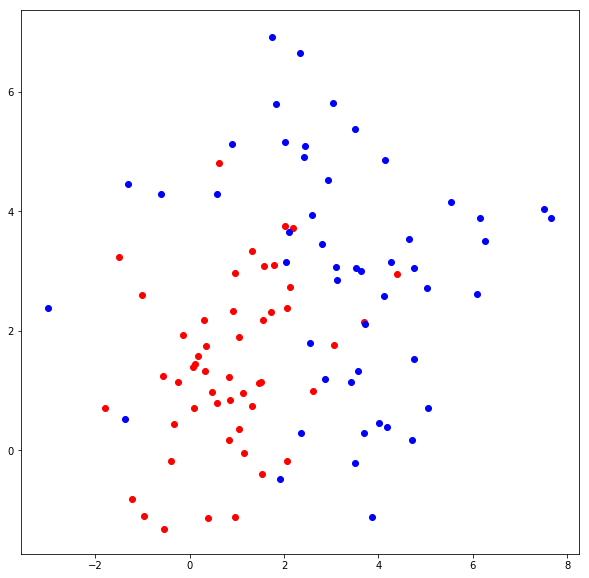

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(D1[:, 0], D1[:, 1], color = 'r')
plt.scatter(D2[:, 0], D2[:, 1], color = 'b')
plt.show()

### steepest gradient descent

In [5]:
def GradientDescent(N, Data):
    X = np.hstack((np.ones(2*N).reshape(-1, 1), Data)) # 2N * 3
    w = np.zeros(3) # 3 * 1
    y = np.hstack((np.zeros(N), np.ones(N))) # 2N
    count = 0
    epsilon = 10 ** -3
    iterMax = 1000
    while count < iterMax:
        count += 1
        gradient = X.T.dot(logestic(X.dot(w)) - y) # 3 * 1
        w -= gradient
        if np.all(np.absolute(gradient) < epsilon):
            break
            
    # print confusion matrix and sensitivity, specificity
    all_predict = logestic(X.dot(w))
    all_predict[:] += 0.5
    all_predict = all_predict.astype(np.int8)
    D0_result = (all_predict[:N] == y[:N])
    D1_result = (all_predict[N:] == y[N:])

    # TP mean true D0 and predict D0
    TP = np.count_nonzero(D0_result)
    # FN mean true D0 but predict D1
    FN = D0_result.shape[0] - TP
    # TN mean true D1 and predict D1
    TN = np.count_nonzero(D1_result)
    # FP mean true D1 but predict D0
    FP = D1_result.shape[0] - TN
    
    print('steepest gradient descent takes {} times to converge'.format(count))
    return w, (TP, FN, FP, TN)

### Newton's method

In [6]:
def Newton(N, Data):
    X = np.hstack((np.ones(2*N).reshape(-1, 1), Data)) # 2N * 3
    w = np.zeros(3) # 3 * 1
    y = np.hstack((np.zeros(N), np.ones(N))) # 2N

    count = 0
    epsilon = 10 ** -3
    iterMax = 1000
    while count < iterMax:
        count += 1
        D = np.diag(logestic(X.dot(w))).dot(np.eye(2*N)-np.diag(logestic(X.dot(w))))
        H = X.T.dot(D).dot(X) # 3 * 3
        gradient = X.T.dot(logestic(X.dot(w)) - y) # 3 * 1

        try:
            delta = np.linalg.inv(H).dot(gradient)
        except:
            delta = gradient
        w -= delta

        if np.all(np.absolute(delta) < epsilon):
            break
            
    # print confusion matrix and sensitivity, specificity
    all_predict = logestic(X.dot(w))
    all_predict[:] += 0.5
    all_predict = all_predict.astype(np.int8)
    D0_result = (all_predict[:N] == y[:N])
    D1_result = (all_predict[N:] == y[N:])

    # TP mean true D0 and predict D0
    TP = np.count_nonzero(D0_result)
    # FN mean true D0 but predict D1
    FN = D0_result.shape[0] - TP
    # TN mean true D1 and predict D1
    TN = np.count_nonzero(D1_result)
    # FP mean true D1 but predict D0
    FP = D1_result.shape[0] - TN

    print('Newton\'s method takes {} times to converge'.format(count))
    return w, (TP, FN, FP, TN)

### Demo task1

In [7]:
w_G, confusion_G = GradientDescent(N, Data)
w_N, confusion_N = Newton(N, Data)

steepest gradient descent takes 1000 times to converge
Newton's method takes 5 times to converge


### Show classification result

Gradient descent:

w:
-183.5314384171544
72.16576115669906
49.98432085071043

Confusion Matrix:
              Predict cluster 1  Predict cluster 2 
Is cluster 1 		35	 	15	
Is cluster 2 		5	 	45	 

Sensitivity (Successfully predict cluster 1): 0.7
Specificity (Successfully predict cluster 2): 0.9



Newton's method:

w:
-183.5314384171544
72.16576115669906
49.98432085071043

Confusion Matrix:
              Predict cluster 1  Predict cluster 2 
Is cluster 1 		39	 	11	
Is cluster 2 		8	 	42	 

Sensitivity (Successfully predict cluster 1): 0.78
Specificity (Successfully predict cluster 2): 0.84


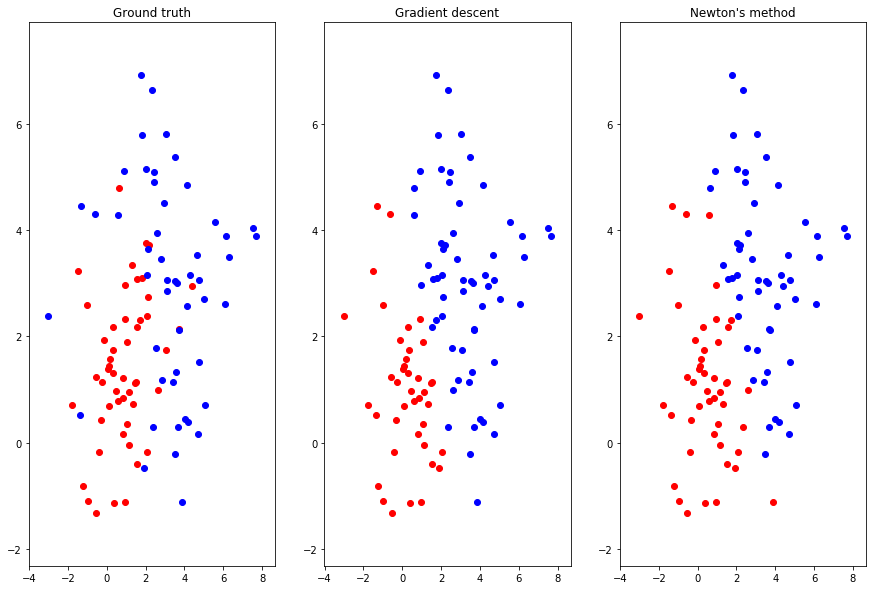

In [8]:
 X = np.hstack((np.ones(2*N).reshape(-1, 1), Data)) # 2N * 3
x_min = np.min(np.minimum(D1[:,0], D2[:,0])) - 1
x_max = np.max(np.maximum(D1[:,0], D2[:,0])) + 1
y_min = np.min(np.minimum(D1[:,1], D2[:,1])) - 1
y_max = np.max(np.maximum(D1[:,1], D2[:,1])) + 1
  
print('Gradient descent:\n')
print('w:')
for i in range(3):
    print(w_G[i])
print('\nConfusion Matrix:')
print(' '*13, 'Predict cluster 1 ', 'Predict cluster 2 ')
print('Is cluster 1', '\t\t{}\t'.format(confusion_G[0]),  '\t{}\t'.format(confusion_G[1]))
print('Is cluster 2', '\t\t{}\t'.format(confusion_G[2]),  '\t{}\t'.format(confusion_G[3]), '\n')
print('Sensitivity (Successfully predict cluster 1):', confusion_G[0] / (confusion_G[0] + confusion_G[1]))
print('Specificity (Successfully predict cluster 2):', confusion_G[3] / (confusion_G[2] + confusion_G[3]))

print('\n\n')
print('Newton\'s method:\n')
print('w:')
for i in range(3):
    print(w_G[i])
print('\nConfusion Matrix:')
print(' '*13, 'Predict cluster 1 ', 'Predict cluster 2 ')
print('Is cluster 1', '\t\t{}\t'.format(confusion_N[0]),  '\t{}\t'.format(confusion_N[1]))
print('Is cluster 2', '\t\t{}\t'.format(confusion_N[2]),  '\t{}\t'.format(confusion_N[3]), '\n')
print('Sensitivity (Successfully predict cluster 1):', confusion_N[0] / (confusion_N[0] + confusion_N[1]))
print('Specificity (Successfully predict cluster 2):', confusion_N[3] / (confusion_N[2] + confusion_N[3]))
    
    
    
plt.figure(figsize=(15, 10))
################
plt.subplot(131)
plt.title('Ground truth')
plt.scatter(D1[:, 0], D1[:, 1], color = 'r')
plt.scatter(D2[:, 0], D2[:, 1], color = 'b')
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
################
plt.subplot(132)
plt.title('Gradient descent')
all_predict1 = logestic(X.dot(w_G))
all_predict1[:] += 0.5
all_predict1 = all_predict1.astype(np.int8)
GD1x = []
GD1y = []
GD2x = []
GD2y = []
for i in range(2*N):
    if not all_predict1[i]:
        GD1x.append(Data[i, 0])
        GD1y.append(Data[i, 1])
    else:
        GD2x.append(Data[i, 0])
        GD2y.append(Data[i, 1])
plt.scatter(GD1x, GD1y, color = 'r')
plt.scatter(GD2x, GD2y, color = 'b')
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))
################
plt.subplot(133)
plt.title('Newton\'s method')
all_predict2 = logestic(X.dot(w_N))
all_predict2[:] += 0.5
all_predict2 = all_predict2.astype(np.int8)
N1x = []
N1y = []
N2x = []
N2y = []
for i in range(2*N):
    if not all_predict2[i]:
        N1x.append(Data[i, 0])
        N1y.append(Data[i, 1])
    else:
        N2x.append(Data[i, 0])
        N2y.append(Data[i, 1])
plt.scatter(N1x, N1y, color = 'r')
plt.scatter(N2x, N2y, color = 'b')
plt.xlim((x_min, x_max))
plt.ylim((y_min, y_max))

plt.show()

# EM algorithm

In [9]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path,'%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path,'%s-images.idx3-ubyte' % kind)
    with open(images_path, "rb") as raw_data:
        raw_data.read(4)
        n = int.from_bytes(raw_data.read(4), byteorder="big")
        r = int.from_bytes(raw_data.read(4), byteorder="big")
        c = int.from_bytes(raw_data.read(4), byteorder="big")
#         images = [raw_data.read(r * c) for i in range(n)]
        images = np.fromfile(raw_data, dtype=np.uint8).reshape(n, 784)
    with open(labels_path, "rb") as raw_data:
        raw_data.read(4)
        n = int.from_bytes(raw_data.read(4), byteorder="big") 
#         labels = [raw_data.read(1)[0] for i in range(n)]
        labels = np.fromfile(raw_data, dtype=np.uint8)
        
#     with open(labels_path, 'rb') as lbpath:
#         magic, n = struct.unpack('>II', lbpath.read(8))
#         labels = np.fromfile(lbpath, dtype=np.uint8)

#     with open(images_path, 'rb') as imgpath:
#         magic, n, rows, cols = struct.unpack('>IIII', imgpath.read(16))
#         images = np.fromfile(imgpath, dtype=np.uint8).reshape(n, 784)

    return images, labels

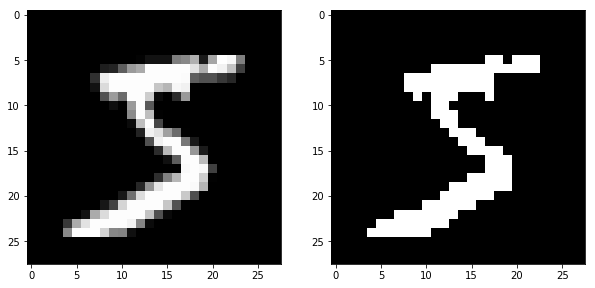

In [44]:
train_img, train_label= load_mnist("./img/", kind='train')
D = 28 * 28
K = 10
N = len(train_img)
images = train_img[:][:]>>7


plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(train_img[0].reshape(28, 28), cmap="gray")
plt.subplot(122)
plt.imshow(images[0].reshape(28, 28), cmap="gray")
plt.show()
# for i, pixel in enumerate(images[0]):
#     if i % 28 == 0:
#         print('')
#     print(pixel, end=' ')

In [45]:
def Estep(images, P, r):
    w = np.array([r]*N)
    logw = LOG(w) + images.dot(LOG(P.T)) + (1-images).dot(LOG(1-P.T))
    logw = (logw.T - np.max(logw, axis=1)).T
    w = np.exp(logw)
    w = (w.T / np.sum(w, axis=1)).T
    return w

In [46]:
def Mstep(images, w):
    r = np.sum(w, axis=0) / N
    for d in range(D):
        P[:, d] = w.T.dot(images[:, d]) / np.sum(w, axis=0)
    return r, P

In [47]:
def LOG(m):
    zero = 10 ** -10
    return np.log(np.where(m > zero, m, zero))

In [48]:
def showDigit(P):
    result = P.reshape((10,28,28))
    result = np.vstack((np.hstack((result[:5])), np.hstack((result[5:]))))
    plt.figure(figsize=(10,10))
    plt.imshow(result, cmap='gray', vmin=0, vmax=1)
    plt.show()

round 0
E step
M step


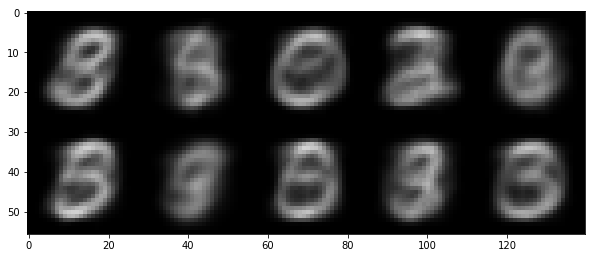

round 1
E step
M step


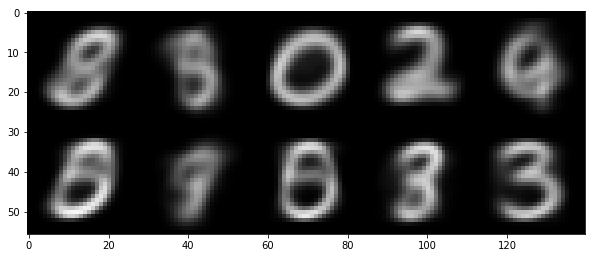

round 2
E step
M step


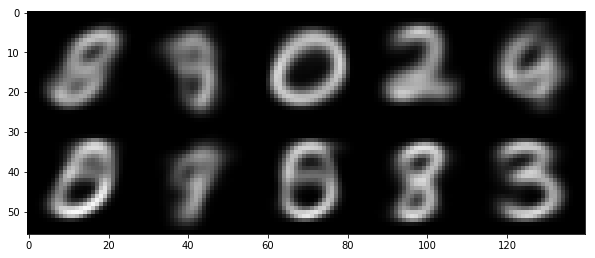

round 3
E step
M step


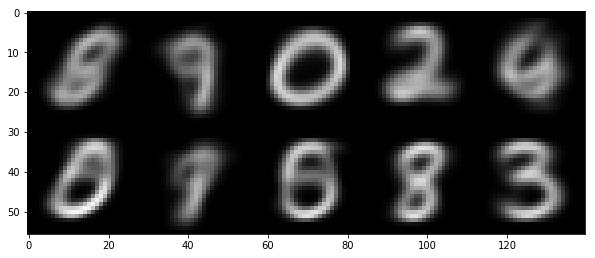

round 4
E step
M step


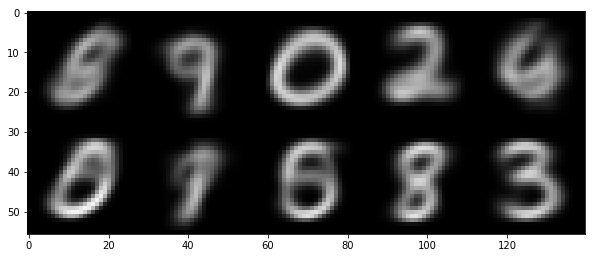

round 5
E step
M step


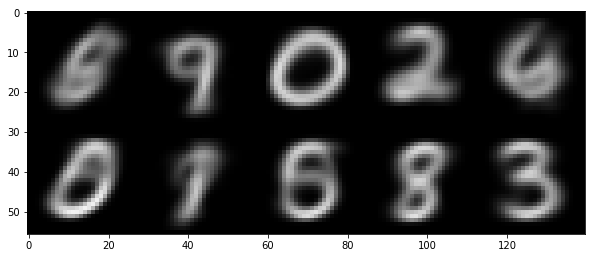

round 6
E step
M step


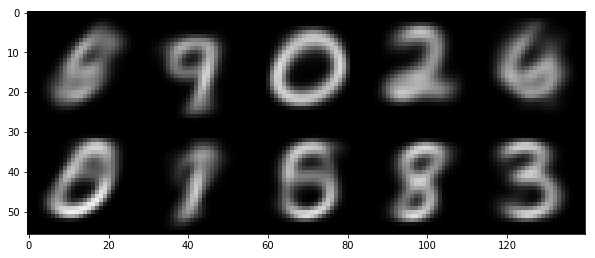

round 7
E step
M step


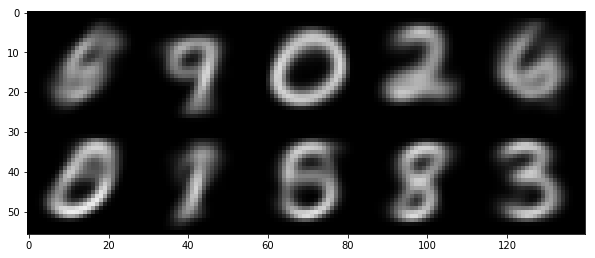

round 8
E step
M step


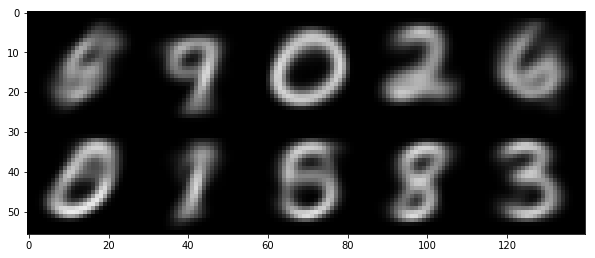

round 9
E step
M step


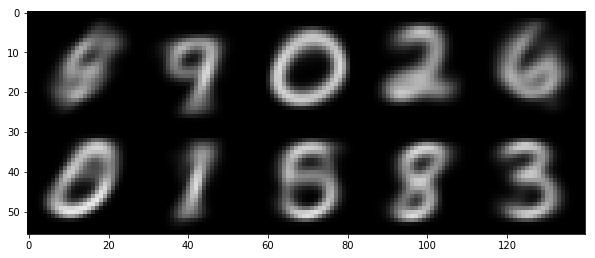

In [49]:
threshold = 0.01
c = 0
P = np.random.uniform(0.4, 0.6, (K, D)) #10 * 784
r = np.full(10, 0.1)
while c < 10:
    print("round", c)
    print("E step")
    w = Estep(images, P, r)
    print("M step")
    r, P = Mstep(images, w)
    showDigit(P)
    c += 1

In [86]:
print(result.astype(int))
print(digit_label)

[[ 235  316  330  183 1246 1704 1967  433  800  481]
 [   2   23   31  182 2861  231    1 4255  148 4039]
 [2729    0   17    5    1   13   17   16    9    7]
 [   0   30 4293  201    6   11    3   43   25    1]
 [ 117   16  468   44 1442   95 3571  119  111  503]
 [2003    0  119  608    4  402  129    5   58    9]
 [   1 6285  119  254  224   97   82 1258  455  635]
 [ 736    0   26  200    3 1412  100    3  498   32]
 [  87   45  180  889   48 1122   44  110 3230  187]
 [  13   27  375 3565    7  334    4   23  517   55]]
[2 6 3 9 1 0 4 1 8 1]


In [87]:
result = np.zeros((10,10))
w_max = np.argmax(w, axis=1)
for i in range(result.shape[0]):
    for j in range(result.shape[1]):
        result[i][j] = np.count_nonzero(train_label[w_max == i] == j) #預測i,實際j
        
class_digit, class_count = np.unique(train_label, return_counts=True)

label_predict = np.argmax(result, axis=0)
for label, predict in enumerate(label_predict):
    TP = np.count_nonzero( train_label[w_max == predict] == label )
    FP = np.count_nonzero( train_label[w_max == predict] != label )
    FN = np.count_nonzero( train_label[w_max != predict] == label )
    TN = np.count_nonzero( train_label[w_max != predict] != label )
    print('\nConfusion Matrix:')
    print(' '*20, ' {:<15}{:>2} {:<15}{:>2} '.format('Predict number', label, 'Predict not number', label))
    print(' {:>15} {:>2}{:15}{:20}'.format('Is number', label, TP, FN))
    print(' {:>15} {:>2}{:15}{:20}'.format('Isn\'t number', label, FP, TN), '\n')
    print('Sensitivity (Successfully predict number {})    : {}'.format(label, TP / (TP + FN)))
    print('Specificity (Successfully predict not number {}): {}'.format(label, TN / (FP + TN)))


Confusion Matrix:
                      Predict number  0 Predict not number 0 
       Is number  0           2729                3194
    Isn't number  0             85               53992 

Sensitivity (Successfully predict number 0)    : 0.46074624345770726
Specificity (Successfully predict not number 0): 0.9984281672430053

Confusion Matrix:
                      Predict number  1 Predict not number 1 
       Is number  1           6285                 457
    Isn't number  1           3125               50133 

Sensitivity (Successfully predict number 1)    : 0.9322159596558884
Specificity (Successfully predict not number 1): 0.9413233692590784

Confusion Matrix:
                      Predict number  2 Predict not number 2 
       Is number  2           4293                1665
    Isn't number  2            320               53722 

Sensitivity (Successfully predict number 2)    : 0.7205438066465257
Specificity (Successfully predict not number 2): 0.9940786795455386

Confusion M